In [188]:
#吴恩达深度学习第二周代码个人自实现
#根据coursera协议，作业代码禁止上传至GitHub

In [189]:
#导入相关数据
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [190]:
#导入h5文件
f = h5py.File(r"C:\Users\alex\Desktop\train_catvnoncat.h5",'r')

In [191]:
#查看H5文件中的分组
for group in f.keys():
    print (group)

list_classes
train_set_x
train_set_y


In [192]:
train_set_ori_x = np.array(f['train_set_x'][:])
train_set_ori_y = np.array(f['train_set_y'][:])

In [193]:
f = h5py.File(r"C:\Users\alex\Desktop\test_catvnoncat.h5",'r')

In [194]:
test_set_ori_x = np.array(f['test_set_x'][:])
test_set_ori_y = np.array(f['test_set_y'][:])

In [195]:
#查看数据集组成
print(train_set_ori_x.shape)
print(train_set_ori_y.shape)
test_set_ori_x.shape

(209, 64, 64, 3)
(209,)


(50, 64, 64, 3)

In [196]:
#改变样本shape
train_set_x = train_set_ori_x.reshape(train_set_ori_x.shape[0],-1).T
train_set_y = train_set_ori_y.reshape(1,-1)
test_set_x=test_set_ori_x.reshape(test_set_ori_x.shape[0],-1).T
test_set_y = test_set_ori_y.reshape(1,-1)
print(train_set_x.shape)
print(train_set_y.shape)

(12288, 209)
(1, 209)


In [197]:
#数据预处理，统计样本个数及进行特征放缩
train_set_x = train_set_x/255
m = train_set_y.shape[1]
test_set_x = test_set_x/255

In [198]:
#设立sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [199]:
#初始化参数 w,b
w = np.zeros((train_set_x.shape[0],1))
b= 0

In [200]:
#进行前向传播
def forward(x,w,b,y,m):
    z = np.dot(w.T,x)+b
    a = sigmoid(z)
    J = -(1/m)*(np.dot(y,(np.log(a)).T)+np.dot(1-y,(np.log(1-a)).T))
    J=np.squeeze(J)
    return a,J

In [201]:
#进行反向传播
def backward(x,w,b,y,m,a,learning_rate):
    dz = a-y
    db = (1/m)*np.sum(dz)
    dw = (1/m)*np.dot(x,dz.T)
    w = w-learning_rate*dw
    b = b-learning_rate*db
    return w,b

In [202]:
def predict(x,w,b,y):
    z = np.dot(w.T,x)+b
    a = sigmoid(z)
    y_prediction = np.zeros((1,y.shape[1]))
    for i in range(y.shape[1]):
        if(a[0,i]>=0.5):
            y_prediction[0,i] = 1
        else:
            y_prediction[0,i] = 0
    return y_prediction

In [203]:
#进行训练
losses = []
for i in range(2000):
    a,J = forward(train_set_x,w,b,train_set_y,m)
    losses.append(J)
    y_prediction_train = predict(train_set_x,w,b,train_set_y)
    y_prediction_test = predict(test_set_x,w,b,test_set_y)
    w,b=backward(train_set_x,w,b,train_set_y,m,a,0.005)
    if(i%100==0):
        print(J)
        print('train accuracy: {} %'.format(100-np.mean(np.abs(y_prediction_train-train_set_y))*100))
        print('test accuracy: {} %'.format(100-np.mean(np.abs(y_prediction_test-test_set_y))*100))

0.6931471805599453
train accuracy: 34.44976076555024 %
test accuracy: 66.0 %
0.5845083636993086
train accuracy: 67.94258373205741 %
test accuracy: 84.0 %
0.46694904094655476
train accuracy: 83.25358851674642 %
test accuracy: 80.0 %
0.37600686694802077
train accuracy: 88.51674641148325 %
test accuracy: 72.0 %
0.3314632893282512
train accuracy: 91.38755980861244 %
test accuracy: 68.0 %
0.30327306747438293
train accuracy: 92.3444976076555 %
test accuracy: 74.0 %
0.2798795865826048
train accuracy: 93.77990430622009 %
test accuracy: 74.0 %
0.2600421369258757
train accuracy: 95.2153110047847 %
test accuracy: 74.0 %
0.24294068467796623
train accuracy: 95.69377990430623 %
test accuracy: 74.0 %
0.22800422256726066
train accuracy: 96.17224880382776 %
test accuracy: 74.0 %
0.21481951378449635
train accuracy: 96.65071770334929 %
test accuracy: 72.0 %
0.20307819060644988
train accuracy: 97.12918660287082 %
test accuracy: 70.0 %
0.1925442771670686
train accuracy: 97.12918660287082 %
test accuracy: 7

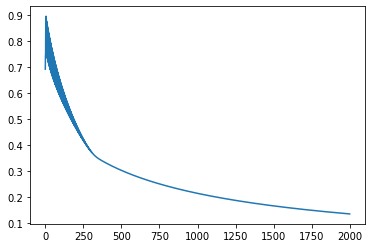

In [204]:
plt.plot(losses)